In [1]:
import pandas as pd

df_main = pd.read_csv("./Archivos/main.csv")
df_prim = pd.read_csv("./Archivos/prim.csv")
df_sec = pd.read_csv("./Archivos/sec.csv")

In [2]:
df_main.columns

Index(['Unnamed: 0', 'movieId', 'title', 'genres', '(no genres listed)',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'year', 'title_cleaned', 'imdbId', 'tmdbId', 'poster_url',
       'poster_source', 'poster_url_tmbd'],
      dtype='object')

In [3]:
df_prim.columns

Index(['Unnamed: 0', 'movieId', 'title', 'poster_url', 'poster_source'], dtype='object')

In [4]:
df_sec.columns

Index(['Unnamed: 0', 'movieId', 'title', 'poster_url_tmbd'], dtype='object')

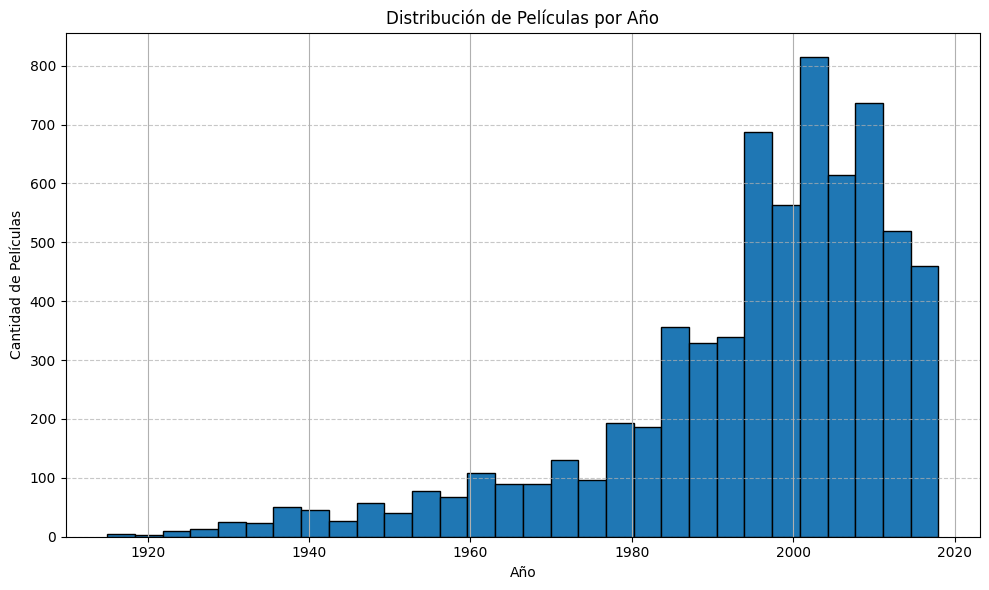

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_main['year'].dropna().astype(int).hist(bins=30, edgecolor='black')
plt.title('Distribución de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./Archivos/hist_movies_year.png')
plt.show()


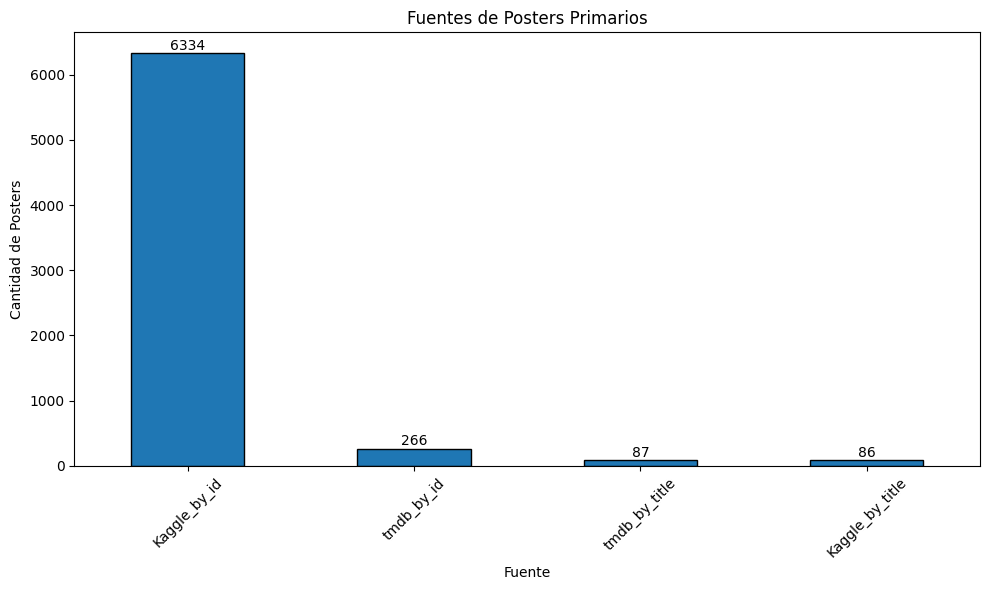

In [15]:
plt.figure(figsize=(10,6))
source_counts = df_prim['poster_source'].value_counts()
bars = source_counts.plot(kind='bar', edgecolor='black')

# Añadir los números
for i, v in enumerate(source_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.title('Fuentes de Posters Primarios')
plt.xlabel('Fuente')
plt.ylabel('Cantidad de Posters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./Archivos/bar_primary_sources.png')
plt.show()


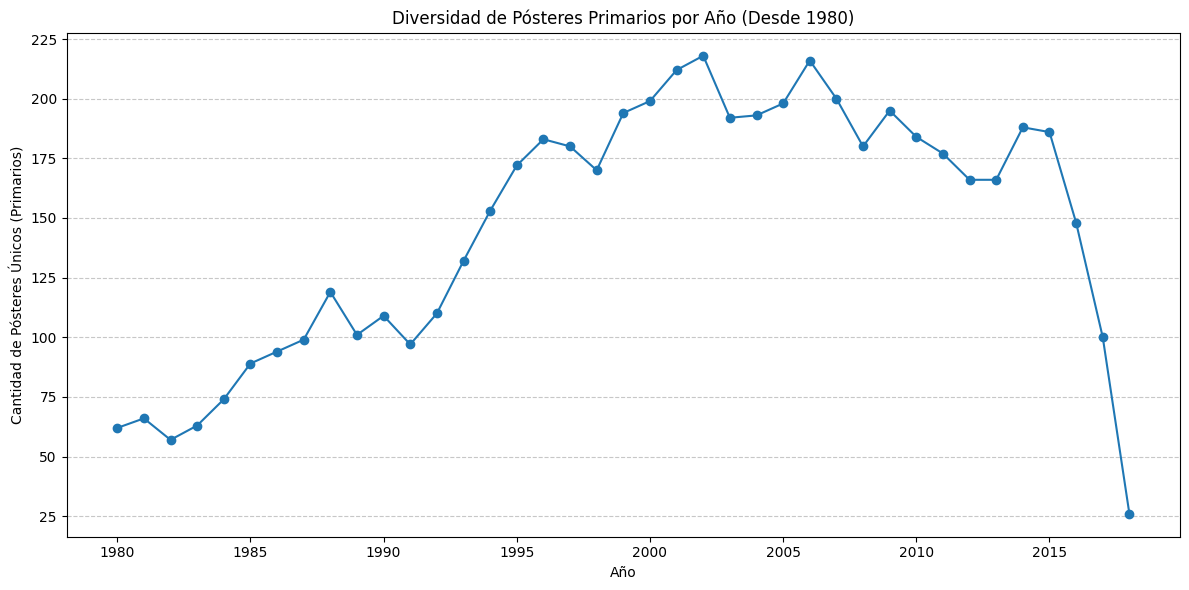

In [18]:
# Filtrar años recientes (por ejemplo >= 1980)
poster_diversity_recent = poster_diversity[poster_diversity.index >= 1980]

plt.figure(figsize=(12,6))
poster_diversity_recent.plot(kind='line', marker='o')

plt.title('Diversidad de Pósteres Primarios por Año (Desde 1980)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Pósteres Únicos (Primarios)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./Archivos/line_primary_diversity_year_recent.png')
plt.show()


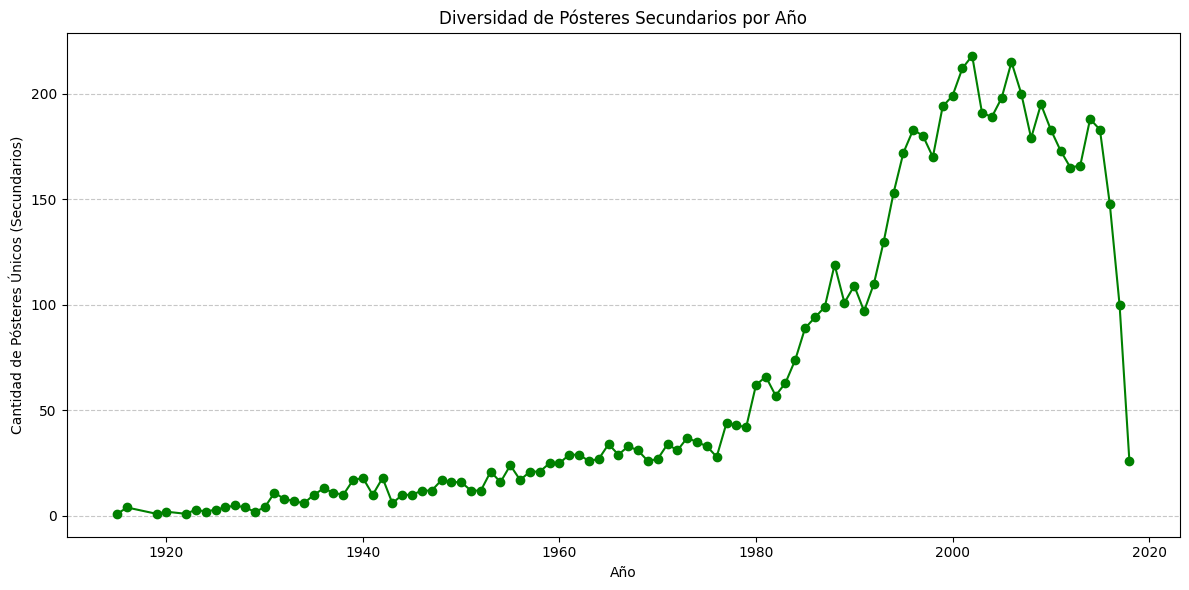

In [22]:
# Merge para obtener año
df_sec_year = df_sec.merge(df_main[['movieId', 'year']], on='movieId', how='left')

# Contar pósteres secundarios únicos por año
poster_sec_diversity = df_sec_year.groupby('year')['movieId'].nunique().sort_index()

# Gráfico de línea
plt.figure(figsize=(12,6))
poster_sec_diversity.plot(kind='line', marker='o', color='green')

plt.title('Diversidad de Pósteres Secundarios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Pósteres Únicos (Secundarios)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./Archivos/line_secondary_diversity_year.png')
plt.show()


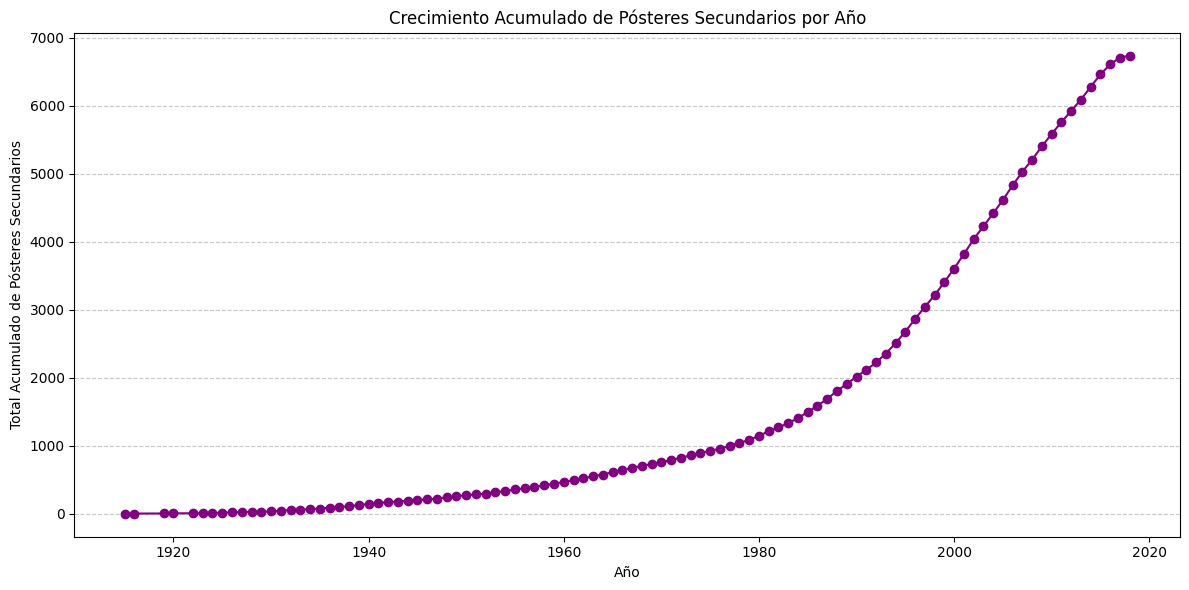

In [28]:
# Crear columna auxiliar
df_main['has_secondary_poster'] = df_main['movieId'].isin(df_sec['movieId']).astype(int)

# Agrupar por año: acumulado
df_cumulative_sec = df_main.groupby('year')['has_secondary_poster'].sum().cumsum()

# Gráfico de línea acumulada
plt.figure(figsize=(12,6))
plt.plot(df_cumulative_sec.index, df_cumulative_sec.values, marker='o', linestyle='-', color='purple')

plt.title('Crecimiento Acumulado de Pósteres Secundarios por Año')
plt.xlabel('Año')
plt.ylabel('Total Acumulado de Pósteres Secundarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('./Archivos/line_cumulative_secondary_poster.png')
plt.show()


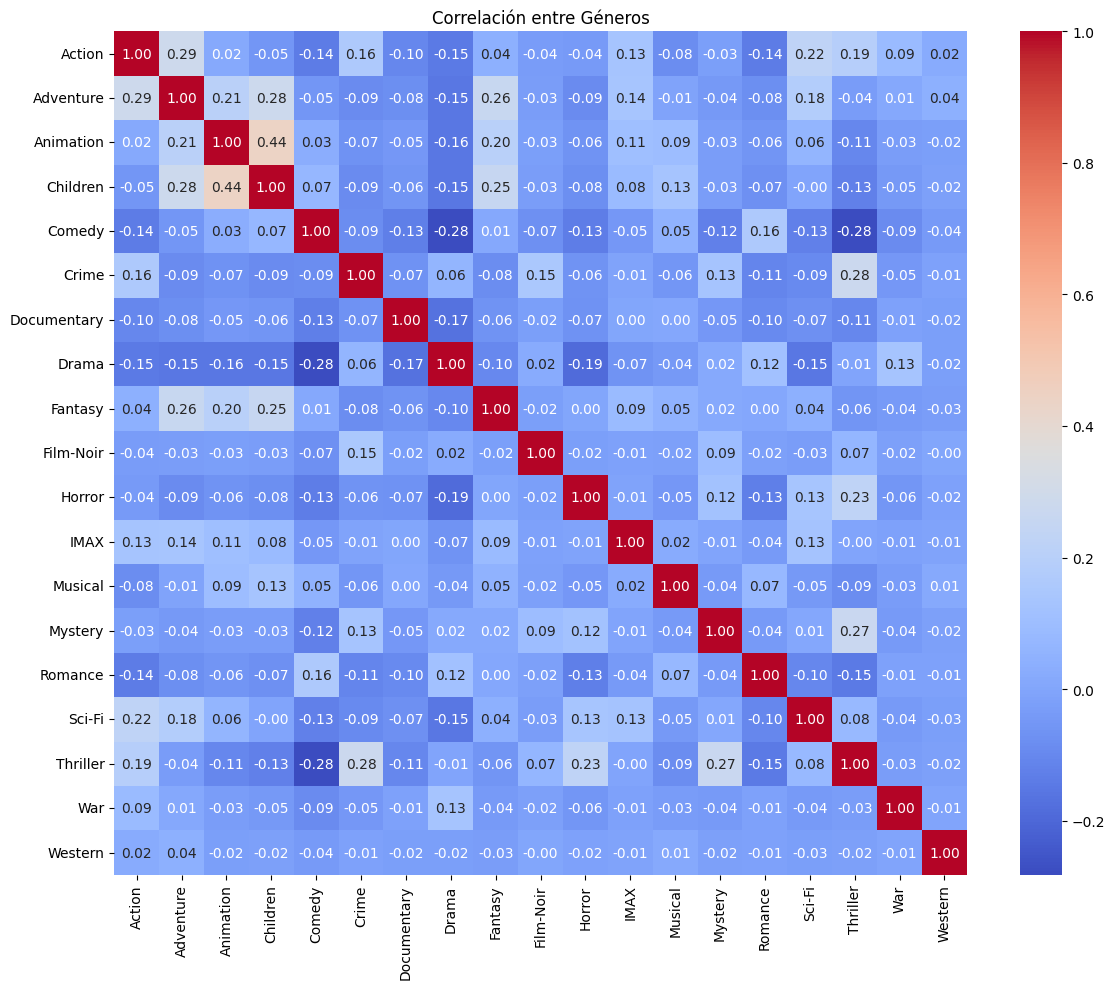

In [ ]:
# MAIN
import seaborn as sns
import matplotlib.pyplot as plt

# Subset de géneros
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Correlation matrix
corr = df_main[genre_columns].corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación entre Géneros')
plt.tight_layout()
plt.savefig('./Archivos/heatmap_genre_correlation.png')
plt.show()


Top 3 géneros más frecuentes: ['Drama', 'Comedy', 'Thriller']


<Figure size 1200x600 with 0 Axes>

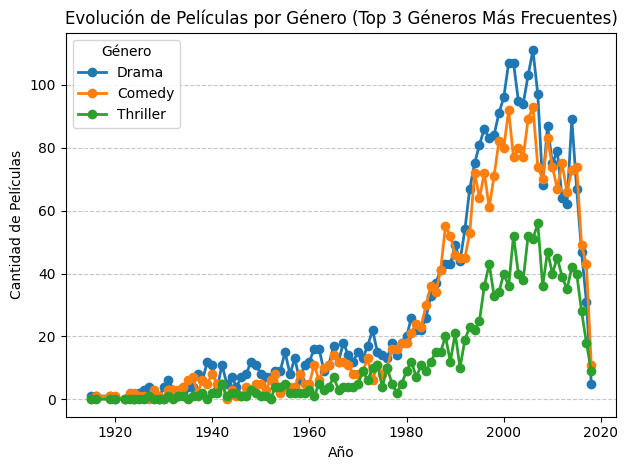

In [34]:
# Agrupar por año y género
df_genre_year = df_main.groupby('year')[genre_columns].sum()

# Calcular el total por género en todo el dataset
total_genre_counts = df_genre_year.sum()

# Seleccionar los 3 géneros más frecuentes
top_3_genres = total_genre_counts.sort_values(ascending=False).head(3).index.tolist()

print(f"Top 3 géneros más frecuentes: {top_3_genres}")

# Graficar solo esos 3 géneros
plt.figure(figsize=(12,6))
df_genre_year[top_3_genres].plot(kind='line', linewidth=2, marker='o')

plt.title('Evolución de Películas por Género (Top 3 Géneros Más Frecuentes)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Películas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Género')
plt.tight_layout()
plt.savefig('./Archivos/line_genre_evolution_top3.png')
plt.show()
